## Machine learning for Health and Bioinformatics Assignment
Changhyun Kim (ID: 21134342)

### Data Cleaning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read data
data = pd.read_csv('PatientTimeSeries.csv')
data.head()

,Patient_id,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
0,p116812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,1,0
1,p116812,102.0,100.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,2,0
2,p116812,102.0,100.0,NaN,99.0,84.0,76.0,18.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,3,0
3,p116812,124.0,100.0,NaN,97.0,70.0,55.0,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,4,0
4,p116812,98.0,100.0,NaN,95.0,73.0,62.0,18.0,NaN,NaN,...,7.5,NaN,6.8,NaN,276.0,59.0,1,-6.01,5,0


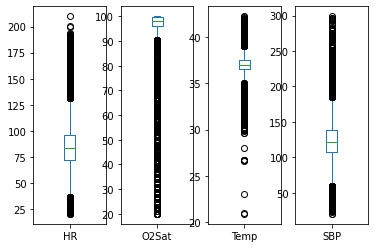

In [3]:
# exclude demographic variables
data = pd.concat([data.loc[:, :'Platelets'], data.loc[:,'SepsisLabel']], axis=1)
data.columns.values[-1] = 'SepsisLabel'
data.iloc[:,:5].plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

All outliers are going to be replaced with the average value of corresponding features.

In [4]:
cols = data.columns[1:-1]
summary_stat = data.describe()
bound = {}
for col in cols:
    q1 = summary_stat.loc['25%', col]
    q3 = summary_stat.loc['75%', col]
    avg = summary_stat.loc['mean', col]
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    bound[col] = (lower_bound, upper_bound)
    data[col] = data[col].apply(lambda x : avg if x >= upper_bound or x <= lower_bound else x)    
data

,Patient_id,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel
0,p116812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,p116812,102.0,100.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,0
2,p116812,102.0,100.0,NaN,99.0,84.0,76.0,18.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,p116812,124.0,100.0,NaN,97.0,70.0,55.0,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,p116812,98.0,100.0,NaN,95.0,73.0,62.0,18.0,NaN,NaN,...,4.1,0.3,NaN,23.1,7.5,NaN,6.8,NaN,276.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,p016300,89.0,100.0,36.44,97.0,67.0,54.0,24.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1048571,p016300,92.0,100.0,NaN,130.0,86.0,62.0,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1048572,p016300,94.0,100.0,NaN,105.0,74.0,59.0,17.0,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1048573,p016300,95.0,100.0,36.89,89.0,65.0,53.0,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


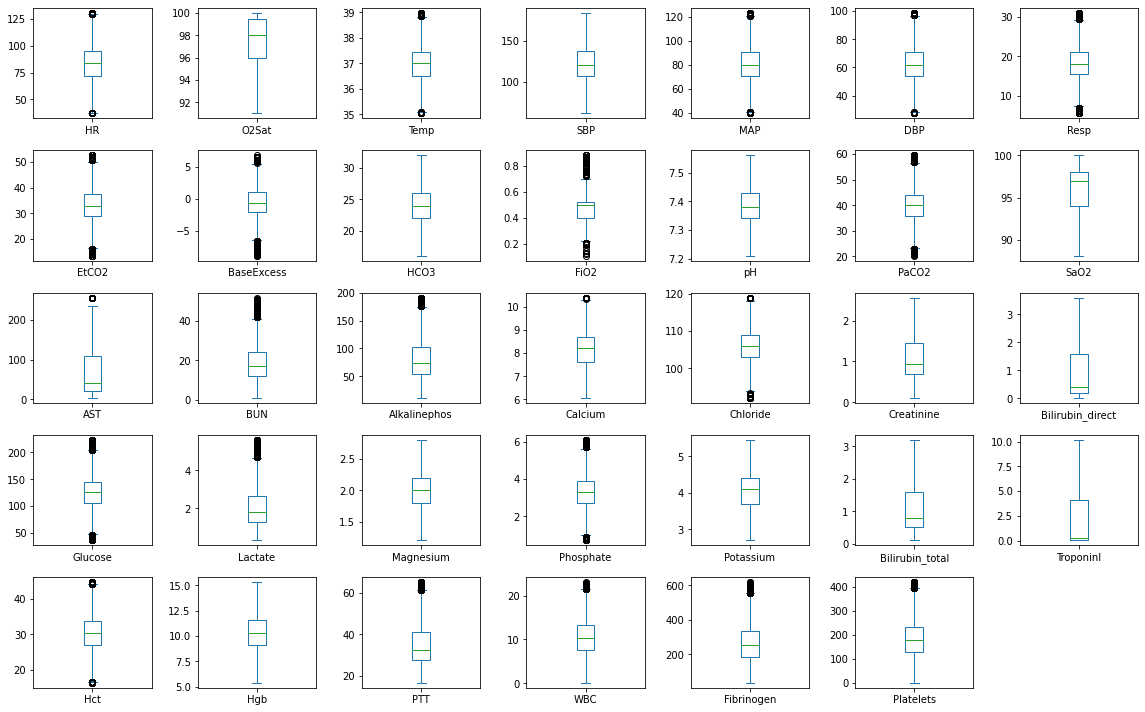

In [5]:
data.iloc[:,:35].plot(kind='box', figsize=(16,10), layout=(5,7),subplots=True, sharex=False, sharey=False)
plt.tight_layout()
plt.show()

The box plots show that many outliers are replaced with the average values comparing to the previous box plots. The black dots in the second box plots are not actually outliers but they are the data points which are really close to the each whisker. To be able to compare easily, there are summary statistics of each feature and their upper and lower bounds to regulate outliers from the original data

In [6]:
pd.DataFrame.from_dict(bound)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets
0,36.75,90.75,35.0,60.5,39.5,27.0,5.25,13.0,-9.0,15.925,...,0.6,2.65,-1.15,-6.0725,16.35,5.35,5.4125,-1.7,-74.5,-48.5
1,130.75,104.75,39.0,184.5,123.5,99.0,31.25,53.0,7.0,32.125,...,6.2,5.45,3.25,10.2275,44.75,15.35,65.1125,23.1,617.5,419.5


In [7]:
data.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel
count,945030.000000,911165.000000,351898.000000,896310.000000,918122.000000,721427.000000,887150.000000,38404.000000,57094.000000,43994.000000,...,96962.000000,15498.000000,10087.000000,92815.000000,77254.000000,30944.000000,67082.000000,6789.000000,61992.000000,1.048575e+06
mean,84.073626,97.400732,36.981815,122.994406,81.618020,63.100957,18.449126,32.894158,-0.744810,24.024672,...,4.076437,1.076367,2.327897,30.615073,10.364040,34.641248,10.697031,271.044571,185.778499,1.805307e-02
std,16.394830,2.274880,0.688462,21.790252,14.606443,12.435326,4.417874,6.958933,2.870535,3.316246,...,0.501563,0.694198,3.336481,5.107546,1.828097,9.173967,4.246537,116.122195,79.442991,1.331434e-01
min,37.000000,91.000000,35.030000,61.000000,39.670000,27.500000,5.500000,13.500000,-8.900000,16.000000,...,2.700000,0.100000,0.010000,16.400000,5.400000,16.600000,0.100000,34.000000,1.000000,0.000000e+00
25%,72.000000,96.000000,36.500000,107.000000,71.000000,54.000000,15.500000,29.000000,-2.000000,22.000000,...,3.700000,0.500000,0.040000,27.000000,9.100000,27.800000,7.600000,185.000000,127.000000,0.000000e+00
50%,83.500000,98.000000,37.000000,121.000000,80.000000,62.000000,18.000000,33.000000,-0.684051,24.000000,...,4.100000,0.800000,0.290000,30.300000,10.300000,32.400000,10.300000,254.000000,181.000000,0.000000e+00
75%,95.000000,99.500000,37.440000,138.000000,91.000000,71.000000,21.000000,37.500000,1.000000,26.000000,...,4.400000,1.600000,4.115000,33.900000,11.600000,41.245061,13.200000,332.000000,234.000000,0.000000e+00
max,130.500000,100.000000,38.970000,184.330000,123.330000,98.500000,31.000000,52.500000,6.800000,32.000000,...,5.450000,3.200000,10.180000,44.700000,15.300000,65.100000,23.050000,617.000000,419.000000,1.000000e+00


### Data Processing

In [8]:
measure_cols = data.columns.values[1:35]
outcome = data.columns.values[35]

cols = data.columns

aggregations = {}
for col in cols:
    if col in measure_cols:
        aggregations[col] = ['first', 'last']    
    elif col in outcome:
        aggregations[col] = ['max']

df2 = data.groupby('Patient_id').agg(aggregations)
df2.head()

HR        O2Sat              Temp           SBP         \
                first   last first       last  first   last  first   last   
Patient_id                                                                  
p000001     97.000000   84.0  95.0  97.193494  36.11  36.33   98.0   78.0   
p000002     61.000000   55.0  99.0  95.000000  36.44  36.11  124.0  114.0   
p000003     87.000000   78.0  96.0  97.000000  37.11  37.11  131.0  138.0   
p000007     84.572025  103.0  94.5  96.500000  37.56  37.67  147.5  108.0   
p000008     73.000000   84.0  99.0  95.000000  36.06  36.17  100.0  136.0   

               MAP        ...   Hgb   PTT         WBC       Fibrinogen       \
             first  last  ...  last first  last first  last      first last   
Patient_id                ...                                                 
p000001      75.33  44.0  ...  12.2   NaN   NaN   5.7  14.7        NaN  NaN   
p000002      65.00  51.0  ...   9.7   NaN   NaN  11.0  11.0        NaN  NaN   
p000003      70.33  83.0  ...  11.0  30.5  29.5  10.0   8.7        NaN  NaN   
p000007     102.00  77.0  ...  14.5  26.6  27.1   9.3   8.8        NaN  NaN   
p000008      67.00  81.0  ...   8.6   NaN   NaN  11.4   9.4        NaN  NaN   

            Platelets            SepsisLabel  
                first       last         max  
Patient_id                                    
p000001     317.00000  338.00000           0  
p000002     158.00000  158.00000           0  
p000003     197.03375  197.03375           0  
p000007      26.00000   43.00000           0  
p000008     357.00000  205.00000           0  

[5 rows x 69 columns]

In [36]:
df = pd.DataFrame()
for col in cols:
    if col in measure_cols:
#       For the data that has only single data during 24-48 hours, aggregated values should be the value itself
#       To achieve the outcome, just make the first value as 0 so that last - first = last 
        df2.loc[df2[col]['last'] == df2[col]['first'], col][['first']] = 0
        df[col] = df2[col]['last'] - df2[col]['first']    
    elif col in outcome:
        df[col] = df2[col]['max']
df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel
Patient_id,,,,,,,,,,,,,,,,,,,,,
p000001,-13.000000,2.193494,0.22,-20.0,-31.330000,NaN,-1.000000,NaN,0.000000,0.000000,...,0.80000,0.0,NaN,-1.00000,-0.300000,NaN,9.0,NaN,21.0,0
p000002,-6.000000,-4.000000,-0.33,-10.0,-14.000000,-7.0,-6.500000,NaN,NaN,0.000000,...,0.00000,NaN,NaN,0.00000,0.000000,NaN,0.0,NaN,0.0,0
p000003,-9.000000,1.000000,0.00,7.0,12.670000,3.0,-3.000000,NaN,5.684051,-3.000000,...,0.30000,NaN,NaN,5.20000,1.900000,-1.0,-1.3,NaN,0.0,0
p000007,18.427975,2.000000,0.11,-39.5,-25.000000,-20.0,-1.725505,NaN,0.000000,-4.063483,...,-1.70000,0.0,NaN,5.91209,4.074452,0.5,-0.5,NaN,17.0,0
p000008,11.000000,-4.000000,0.11,36.0,14.000000,3.5,-1.500000,NaN,2.000000,1.000000,...,-0.36586,NaN,NaN,-7.90000,-2.800000,NaN,-2.0,NaN,-152.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p119995,-1.000000,0.000000,-0.20,10.0,1.000000,-4.0,-3.000000,NaN,NaN,NaN,...,0.00000,NaN,NaN,0.00000,0.000000,NaN,0.0,0.0,0.0,0
p119996,1.000000,-2.000000,0.00,-27.0,-22.000000,-22.0,-2.000000,NaN,NaN,NaN,...,0.70000,0.0,0.0,0.00000,0.000000,NaN,0.0,NaN,0.0,0
p119997,-12.000000,3.000000,1.00,-7.0,18.000000,0.0,6.000000,0.0,NaN,NaN,...,0.50000,0.0,0.0,13.21209,4.574452,0.0,-0.8,NaN,-24.0,0


The matrix contains demographic variables as well so that its shape is 27186 x 39

### Understanding the data

This section consists of 4 parts
- Dataframe grouping by outcome variable (SepsisLabel = 1 or 0)
- Performs t-test whether there is significant difference of means between two dataframes
- Features distributions across each outcome
- Measures missingness of each feature and imputation using KNNImputer

#### Part 1. Dataframe subsetting
This part divides the dataframe into two subset by the outcome variable (SepsisLabel)


In [37]:
df.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel
count,27184.000000,27173.000000,26984.000000,27009.000000,27123.000000,22235.000000,27143.000000,2158.000000,8908.000000,13623.000000,...,25898.000000,9584.000000,4822.000000,25617.000000,25534.000000,13672.000000,25421.000000,3056.000000,25448.000000,27186.000000
mean,-0.742612,-0.988459,0.241653,-0.650400,-1.312686,-1.289284,1.181092,1.367192,0.476502,0.601439,...,0.013149,-0.017492,0.013859,-0.618497,-0.220180,-0.566587,-0.150588,17.380480,-8.463058,0.073163
std,16.736818,2.750414,0.836376,24.192553,16.689580,13.686577,5.493635,7.520192,2.822645,2.775081,...,0.502532,0.269889,1.090532,3.714326,1.236628,6.718491,2.993529,75.171336,40.232762,0.260408
min,-83.000000,-9.000000,-3.300000,-98.000000,-74.500000,-61.000000,-21.000000,-33.000000,-11.600000,-11.000000,...,-2.300000,-2.300000,-8.760000,-22.700000,-8.000000,-42.000000,-19.900000,-396.000000,-320.000000,0.000000
25%,-11.000000,-3.000000,-0.300000,-16.000000,-12.000000,-10.000000,-2.000000,-2.000000,-1.000000,0.000000,...,-0.200000,0.000000,0.000000,-2.300000,-0.800000,-0.700000,-1.100000,0.000000,-21.000000,0.000000
50%,-0.463987,-1.000000,0.200000,-0.500000,-1.000000,-1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,0.500000,0.730000,15.000000,9.000000,7.000000,4.500000,5.500000,2.000000,2.000000,...,0.200000,0.000000,0.000000,0.500000,0.100000,0.000000,0.600000,7.000000,0.000000,0.000000
max,76.000000,9.000000,3.740000,96.000000,70.500000,64.000000,23.500000,30.000000,14.000000,16.000000,...,2.500000,2.400000,9.210000,26.100000,7.000000,39.200000,20.600000,484.000000,331.000000,1.000000


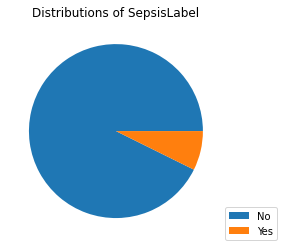

In [38]:
labels = ['No', 'Yes']
plt.pie(df['SepsisLabel'].value_counts())
plt.title('Distributions of SepsisLabel')
plt.legend(loc=(1,0), labels=labels)
plt.show()

In [39]:
# df.groupby('SepsisLabel').plot(kind='hist', layout=(6,8),figsize=(16,10), subplots=True)
sepsis_group = df[df['SepsisLabel'] == 1]
nonsepsis_group = df[df['SepsisLabel'] != 1]

sepsis_group.shape

(1989, 35)

In [40]:
nonsepsis_group.shape

(25197, 35)

#### Part2. t-test

Performed t-test for each feature in two subsets\
H0: no difference in means between two samples\
H1: difference in means between two samples

In [41]:
import scipy.stats as stats

In [42]:
cols = sepsis_group.columns[0:34]
diff = []
non_diff = []
for col in cols:
    stat, pvalue = stats.ttest_ind(sepsis_group[col], nonsepsis_group[col], nan_policy='omit')
    if pvalue < 0.05:
        diff.append(col)
    else:
        non_diff.append(col)
    print(col, 'statistics: ' + str(stat), 'p-value: ' + str(pvalue))


HR statistics: 8.239802483295882 p-value: 1.8017597747086644e-16
O2Sat statistics: 5.717752542890218 p-value: 1.0907283156890522e-08
Temp statistics: 10.041210331080968 p-value: 1.1053320057543049e-23
SBP statistics: -3.6757902607974704 p-value: 0.00023757323207638056
MAP statistics: -3.9207183555720744 p-value: 8.850237906078438e-05
DBP statistics: -4.112470250010739 p-value: 3.928546862153708e-05
Resp statistics: -2.6290847624376474 p-value: 0.008566326414200322
EtCO2 statistics: -1.7174923180318482 p-value: 0.08603285830960349
BaseExcess statistics: 3.2485289326010562 p-value: 0.0011643344979083165
HCO3 statistics: 1.746924812665035 p-value: 0.08067291883610189
FiO2 statistics: 6.25832836016367 p-value: 4.02351682915542e-10
pH statistics: 1.9271526099398408 p-value: 0.0539828101696273
PaCO2 statistics: 0.1122352961473454 p-value: 0.910638665826183
SaO2 statistics: -0.0020026374728026493 p-value: 0.9984021728485459
AST statistics: 0.844167469669879 p-value: 0.39859672125899204
BUN st

In [43]:
print(diff)
print(non_diff)

['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess', 'FiO2', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Lactate', 'Magnesium', 'Bilirubin_total', 'Hgb', 'WBC', 'Fibrinogen', 'Platelets']
['EtCO2', 'HCO3', 'pH', 'PaCO2', 'SaO2', 'AST', 'Glucose', 'Phosphate', 'Potassium', 'TroponinI', 'Hct', 'PTT']


In [44]:
# Summary statistics
sepsis_group.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel
count,1989.000000,1988.000000,1963.000000,1918.000000,1989.000000,1666.000000,1979.000000,354.000000,1067.000000,1183.000000,...,1881.000000,1068.000000,347.000000,1852.000000,1837.000000,1318.000000,1825.000000,397.000000,1823.000000,1989.0
mean,2.230691,-0.649096,0.423843,-2.607046,-2.724705,-2.615129,0.868517,0.739830,0.739725,0.736117,...,0.016802,0.005400,0.123691,-0.771038,-0.307053,-0.250039,0.278093,30.287879,-5.368531,1.0
std,18.964518,2.838972,0.972936,26.341427,17.315277,13.849413,5.871001,7.359467,3.359781,3.358464,...,0.547972,0.314511,1.195856,4.370650,1.462887,7.698951,3.922704,92.027856,56.361020,0.0
min,-67.000000,-9.000000,-2.720000,-96.500000,-66.000000,-57.500000,-20.000000,-26.500000,-10.400000,-11.000000,...,-1.890000,-2.300000,-3.800000,-22.700000,-6.800000,-42.000000,-19.900000,-268.000000,-246.000000,1.0
25%,-9.000000,-2.500000,-0.200000,-19.000000,-13.500000,-11.000000,-3.000000,-3.000000,-1.000000,-0.936517,...,-0.270000,0.000000,0.000000,-2.825000,-1.000000,-1.200000,-1.100000,0.000000,-25.500000,1.0
50%,2.000000,-0.193494,0.300000,-2.882973,-3.000000,-2.500000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,14.000000,1.000000,1.050000,13.000000,8.000000,5.000000,4.000000,4.500000,2.000000,2.000000,...,0.300000,0.000000,0.000000,0.900000,0.100000,1.000000,1.800000,33.000000,6.500000,1.0
max,76.000000,9.000000,3.600000,95.000000,65.000000,48.000000,22.500000,20.500000,12.000000,13.000000,...,2.100000,2.200000,9.210000,14.100000,6.500000,36.100000,15.100000,408.000000,331.000000,1.0


In [45]:
# Summary statistics
nonsepsis_group.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel
count,25195.000000,25185.000000,25021.000000,25091.000000,25134.000000,20569.000000,25164.000000,1804.000000,7841.000000,12440.000000,...,24017.000000,8516.000000,4475.000000,23765.000000,23697.000000,12354.000000,23596.000000,2659.000000,23625.000000,25197.0
mean,-0.977337,-1.015246,0.227359,-0.500830,-1.200944,-1.181897,1.205675,1.490300,0.440683,0.588631,...,0.012863,-0.020363,0.005342,-0.606609,-0.213446,-0.600358,-0.183744,15.453350,-8.701844,0.0
std,16.525843,2.741571,0.823024,24.014392,16.634299,13.668014,5.462217,7.547214,2.739726,2.712893,...,0.498809,0.263641,1.081616,3.658077,1.217111,6.604762,2.906801,72.141252,38.701364,0.0
min,-83.000000,-9.000000,-3.300000,-98.000000,-74.500000,-61.000000,-21.000000,-33.000000,-11.600000,-10.000000,...,-2.300000,-2.300000,-8.760000,-22.700000,-8.000000,-39.200000,-15.300000,-396.000000,-320.000000,0.0
25%,-11.000000,-3.000000,-0.300000,-16.000000,-12.000000,-10.000000,-2.000000,-2.000000,-1.000000,0.000000,...,-0.200000,0.000000,0.000000,-2.200000,-0.700000,-0.600000,-1.100000,0.000000,-21.000000,0.0
50%,-0.500000,-1.000000,0.170000,0.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,9.000000,0.500000,0.720000,15.000000,9.000000,7.000000,4.500000,5.500000,2.000000,2.000000,...,0.200000,0.000000,0.000000,0.400000,0.100000,0.000000,0.500000,3.500000,0.000000,0.0
max,75.000000,9.000000,3.740000,96.000000,70.500000,64.000000,23.500000,30.000000,14.000000,16.000000,...,2.500000,2.400000,8.520000,26.100000,7.000000,39.200000,20.600000,484.000000,246.000000,0.0


#### Part3. Plot distributions of each feature across outcome variable


In [46]:
def plot_distrib(df, title):    
    fig, axes = plt.subplots(7, 5, figsize=(16,10), sharex=False, sharey=False)
    colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

    for i, ax in enumerate(axes.flatten()):
        x = df.iloc[:,i]
        ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, color=colors[i % 5])
        ax.set_title(df.columns[i])

    plt.suptitle(title, size=16)
    plt.tight_layout();

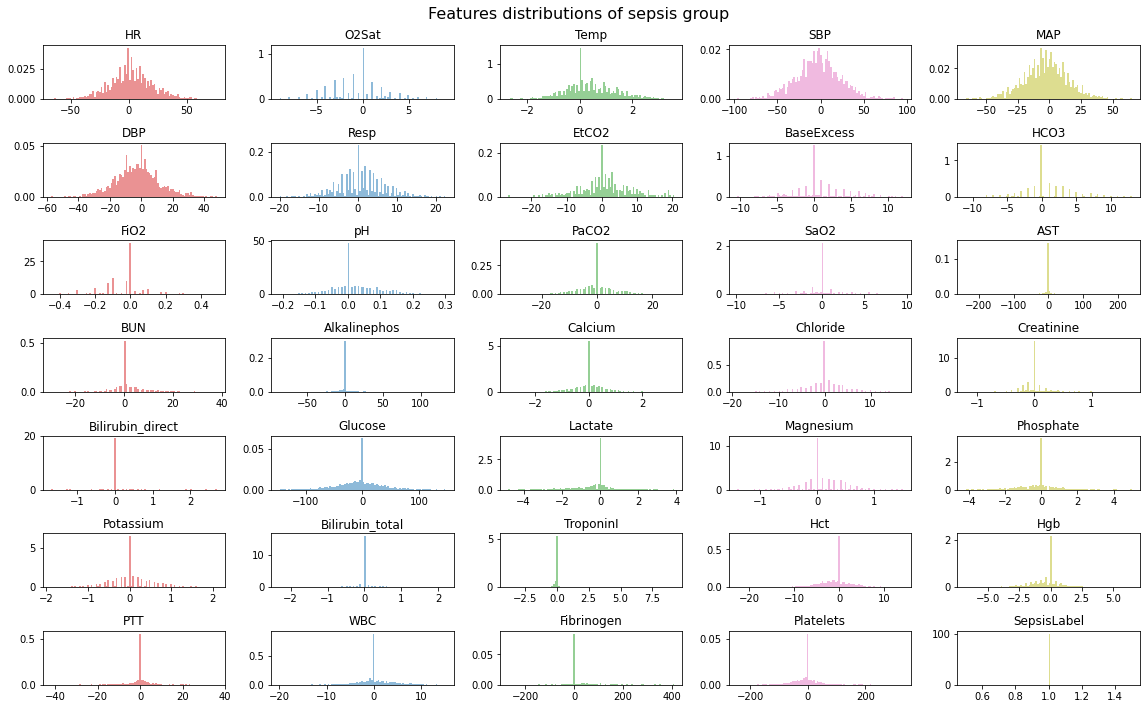

In [47]:
plot_distrib(sepsis_group, 'Features distributions of sepsis group')

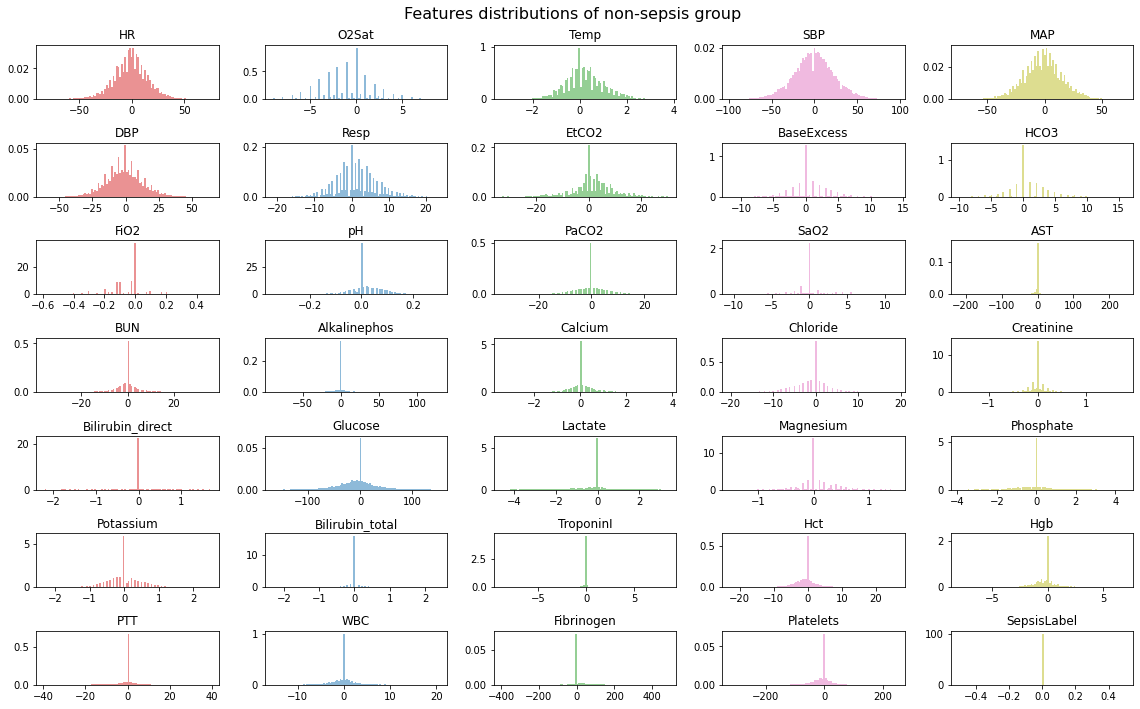

In [48]:
plot_distrib(nonsepsis_group, 'Features distributions of non-sepsis group')

#### Part 4. Measures missingness and imputation

Calculates the percentage of missingess of each feature. Then, drop the features if their missingness are over 60% due to too many missing values to perform imputation. With the remained features, the missing values are imputed by using KNNImputer

In [49]:
n = len(df)
miss = df.isnull().sum() / n * 100
exclude = miss[miss > 60].index
print(exclude)
print('Missingness in each feature (%)')
miss

Index(['EtCO2', 'BaseExcess', 'SaO2', 'AST', 'Alkalinephos',
       'Bilirubin_direct', 'Lactate', 'Bilirubin_total', 'TroponinI',
       'Fibrinogen'],
      dtype='object')
Missingness in each feature (%)


HR                   0.007357
O2Sat                0.047819
Temp                 0.743030
SBP                  0.651070
MAP                  0.231737
DBP                 18.211579
Resp                 0.158170
EtCO2               92.062091
BaseExcess          67.233135
HCO3                49.889649
FiO2                55.749283
pH                  53.100861
PaCO2               54.517031
SaO2                67.556831
AST                 64.437578
BUN                  5.105569
Alkalinephos        64.886339
Calcium             13.286250
Chloride            46.946958
Creatinine           5.175458
Bilirubin_direct    94.809829
Glucose              3.998382
Lactate             69.024498
Magnesium           12.212168
Phosphate           29.864636
Potassium            4.737733
Bilirubin_total     64.746561
TroponinI           82.262929
Hct                  5.771353
Hgb                  6.076657
PTT                 49.709409
WBC                  6.492312
Fibrinogen          88.758920
Platelets 

In [50]:
df = df[df.columns[~df.columns.isin(exclude)]]
print(df.shape)
df

(27186, 25)


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,HCO3,FiO2,pH,...,Glucose,Magnesium,Phosphate,Potassium,Hct,Hgb,PTT,WBC,Platelets,SepsisLabel
Patient_id,,,,,,,,,,,,,,,,,,,,,
p000001,-13.000000,2.193494,0.22,-20.0,-31.330000,NaN,-1.000000,0.000000,-0.030000,-0.04,...,-60.000000,0.2,0.4,0.80000,-1.00000,-0.300000,NaN,9.0,21.0,0
p000002,-6.000000,-4.000000,-0.33,-10.0,-14.000000,-7.0,-6.500000,0.000000,NaN,NaN,...,0.000000,0.0,0.0,0.00000,0.00000,0.000000,NaN,0.0,0.0,0
p000003,-9.000000,1.000000,0.00,7.0,12.670000,3.0,-3.000000,-3.000000,0.300000,-0.02,...,79.000000,-0.1,0.5,0.30000,5.20000,1.900000,-1.0,-1.3,0.0,0
p000007,18.427975,2.000000,0.11,-39.5,-25.000000,-20.0,-1.725505,-4.063483,-0.124585,0.11,...,2.908659,-0.1,-2.8,-1.70000,5.91209,4.074452,0.5,-0.5,17.0,0
p000008,11.000000,-4.000000,0.11,36.0,14.000000,3.5,-1.500000,1.000000,NaN,0.09,...,-45.000000,0.7,-0.8,-0.36586,-7.90000,-2.800000,NaN,-2.0,-152.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p119995,-1.000000,0.000000,-0.20,10.0,1.000000,-4.0,-3.000000,NaN,NaN,NaN,...,13.000000,0.0,0.0,0.00000,0.00000,0.000000,NaN,0.0,0.0,0
p119996,1.000000,-2.000000,0.00,-27.0,-22.000000,-22.0,-2.000000,NaN,NaN,NaN,...,-25.000000,0.7,NaN,0.70000,0.00000,0.000000,NaN,0.0,0.0,0
p119997,-12.000000,3.000000,1.00,-7.0,18.000000,0.0,6.000000,NaN,NaN,NaN,...,4.500000,0.0,0.0,0.50000,13.21209,4.574452,0.0,-0.8,-24.0,0


### 'Scope out' the techniques combinations

Since there are lots of techniques to handle data missingness and imbalanced data, the comparisons between various combinations of imputation and balancing methods are essential to build robust model. 

For imputation method candidates:
- KNNImputer
- SimpleImputer (Mean)

For handling imbalanced data:
- class_weights for XGBoost
- Mix of SMOTE for oversampling and Random undersampling for GradientBoostingClassifier (GBC)

Unfortunately, GradientBoostingClassifer in Scikit-learn package does not have the `class_weight` parameter at the moment and only XGBoost classifier has the parameter. Based on the relaxed selecting classifiers, the balancing weight techniques and combined under and oversampling method are applied to XGBoost and GBC respectively.

In [66]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import xgboost

In [67]:
# Preparing imputed data
knn_imputer = KNNImputer()
mean_imputer = SimpleImputer(strategy='mean')

X = df.iloc[:,:-1]
y = df['SepsisLabel']
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(x_scaled), columns=X.columns)
X_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(x_scaled), columns=X.columns)

X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean_imputed, y, test_size=0.3, random_state=1, stratify=y)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn_imputed, y, test_size=0.3, random_state=1, stratify=y)

In [68]:
print('missing values (mean):', X_mean_imputed.isnull().sum().values.sum())
print('missing values (knn):', X_knn_imputed.isnull().sum().values.sum())

missing values (mean): 0
missing values (knn): 0


In [87]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from numpy import mean

In [55]:
# Plot confusion matrix and print classification report for checking model's performance
def calc_performance(y_test, y_pred):
    cm= confusion_matrix(y_test, y_pred)  

    #class_names contains the labels we would like to use. This can be ignored.
    class_names  =[0, 1]
    cm = confusion_matrix(y_test, y_pred, labels=class_names)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)    
    print(classification_report(y_test,y_pred))
    print('ROC-AUC:',roc_auc_score(y_test, y_pred))
    disp.plot()
    plt.show()

In [56]:
def plot_roc_curve(y_true, y_decision):
    fpr, tpr, _ = roc_curve(y_true, y_decision)
    plt.figure()
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc_score(y_true, y_decision),
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()
    

#### Gradient Boosting Classifier with SMOTE

- The data is highly unbalanced as shown above. SMOTE is one of the best algorithm to cope with this issue by synthesising objects in the minority class to make them balanced

In [69]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy='majority')

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_overunder_mean, y_overunder_mean = pipeline.fit_resample(X_train_mean, y_train_mean)
X_overunder_knn, y_overunder_knn = pipeline.fit_resample(X_train_knn, y_train_knn)

print(Counter(y_overunder_mean))
print(Counter(y_overunder_knn))

Counter({0: 8819, 1: 8819})
Counter({0: 8819, 1: 8819})


-------------Mean imputation and over-undersampling for GBC--------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7559
           1       0.25      0.29      0.27       597

    accuracy                           0.89      8156
   macro avg       0.60      0.61      0.60      8156
weighted avg       0.89      0.89      0.89      8156

ROC-AUC: 0.6094814594203988


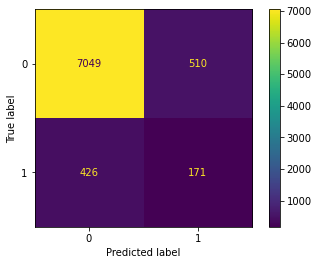

-------------KNN imputation and over-undersampling for GBC--------------
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7559
           1       0.14      0.24      0.17       597

    accuracy                           0.84      8156
   macro avg       0.54      0.56      0.54      8156
weighted avg       0.88      0.84      0.85      8156

ROC-AUC: 0.5596171092265136


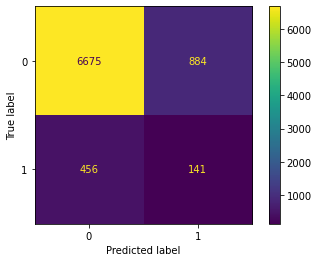

In [71]:
gbc_mean = GradientBoostingClassifier(random_state=1)
gbc_knn = GradientBoostingClassifier(random_state=1)

gbc_mean.fit(X_overunder_mean, y_overunder_mean)
gbc_knn.fit(X_overunder_knn, y_overunder_knn)
y_pred_mean = gbc_mean.predict(X_test_mean)
y_pred_knn = gbc_knn.predict(X_test_knn)


print('-------------Mean imputation and over-undersampling for GBC--------------')
calc_performance(y_test_mean, y_pred_mean)
print('-------------KNN imputation and over-undersampling for GBC--------------')
calc_performance(y_test_knn, y_pred_knn)

#### XGBoost with class_weights
- First, calcuate the proportion of majority class to minority class
- The XGBoost documentation recommends the value of class_weights as `num(majority class) / num(minority class)`
- Then, train the model

In [77]:
counter_mean = Counter(y_train_mean)
counter_knn = Counter(y_train_knn)
ratio_mean = counter_mean[0] / counter_mean[1]
ratio_knn = counter_knn[0] / counter_knn[1]
print('Class Ratio for mean imputed:', ratio_mean)
print('Class Ratio for knn imputed:', ratio_knn)
print('Are they same:', ratio_mean == ratio_knn)

ratio = ratio_mean

Class Ratio for mean imputed: 12.670977011494253
Class Ratio for knn imputed: 12.670977011494253
Are they same: True


-------------Mean imputation and over-undersampling for GBC--------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7559
           1       0.25      0.28      0.27       597

    accuracy                           0.89      8156
   macro avg       0.60      0.61      0.60      8156
weighted avg       0.89      0.89      0.89      8156

ROC-AUC: 0.6086663196478046


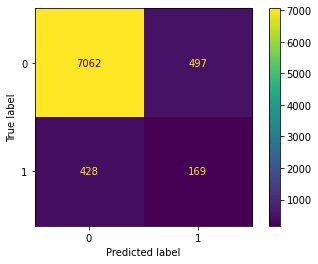

-------------KNN imputation and over-undersampling for GBC--------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7559
           1       0.17      0.17      0.17       597

    accuracy                           0.88      8156
   macro avg       0.55      0.55      0.55      8156
weighted avg       0.88      0.88      0.88      8156

ROC-AUC: 0.5534560840539071


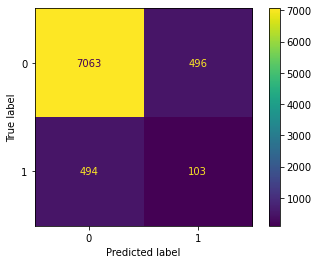

In [78]:
xgb_mean = XGBClassifier(scale_pos_weight=ratio)
xgb_knn = XGBClassifier(scale_pos_weight=ratio)

xgb_mean.fit(X_train_mean, y_train_mean)
xgb_knn.fit(X_train_knn, y_train_knn)

y_pred_mean = xgb_mean.predict(X_test_mean)
y_pred_knn = xgb_knn.predict(X_test_knn)


print('-------------Mean imputation and over-undersampling for GBC--------------')
calc_performance(y_test_mean, y_pred_mean)
print('-------------KNN imputation and over-undersampling for GBC--------------')
calc_performance(y_test_knn, y_pred_knn)

### Result
After comparing the technique combinations, the best technique combination is to use over-undersampling using GBC and mean imputation. The result shows the worse performances that used KNNImputer than the other. Except that, the performance differences between dealing with imbalanced data are negligible. 

From now, over-undersampling using GBC is regarded as the best model and the optimal hyperparameter sets are found through Gridsearch cross-validation

In [79]:
# Not to confuse using wrong data, simply assign the selected manipulated variables to the simple variables
X_train, X_test, y_train, y_test = X_overunder_mean, X_test_mean, y_overunder_mean, y_test_mean

### Hyperparameter tuning
In hyperparameter tuning section, the model parameters that involves model performance will be tuned through grid search cross validation to maximise its generalisability for unseen data. The selected hyperparameters are followed as:

- `learning_rate`\
The parameter controls how much the model learns from the data in each epoch. There is a trade-off between this parameter and the total number of weak predictors (default: 0.1)
- `n_estimators`\
The parameter is about the number of trees in the model. It obviously controls the complexity of the model because it involves in the structure of the model. Large number of it tends to have better performance but be careful for overfitting. (default:100)
- `max_depth`\
The parameter is about the maximum depth of the individual decision trees in the model. (default: 6)

In [99]:

params = {'n_estimators': [50, 100, 150],         
          "min_samples_leaf": [1, 5, 20, 50],
         'max_features' : [3,5,8]}
gridcv = GridSearchCV(GradientBoostingClassifier(), 
                      param_grid=params,
                      cv=5,
                      n_jobs=-1)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_features': [3, 5, 8],
                         'min_samples_leaf': [1, 5, 20, 50],
                         'n_estimators': [50, 100, 150]})

In [100]:
print('Best params:', gridcv.best_params_)
print('Score:', gridcv.best_score_)

Best params: {'max_features': 8, 'min_samples_leaf': 50, 'n_estimators': 150}
Score: 0.8951124046632166


In [101]:
y_pred = gridcv.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7559
           1       0.26      0.36      0.31       597

    accuracy                           0.88      8156
   macro avg       0.61      0.64      0.62      8156
weighted avg       0.90      0.88      0.89      8156

ROC-AUC: 0.6417235225827067


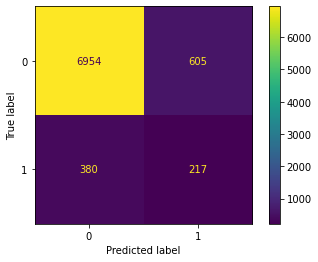

In [102]:
calc_performance(y_test,y_pred)

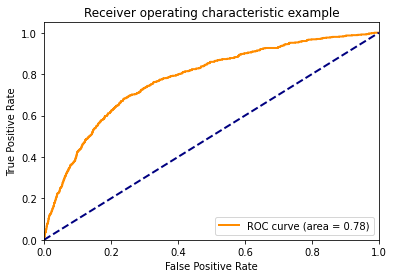

0.7765838940258466

In [103]:
y_score = gridcv.predict_proba(X_test)
plot_roc_curve(y_test, y_score[:,1])
roc_auc_score(y_test, y_score[:,1])

In [ ]:
import shap

In [ ]:
best_model = gridcv.best_estimator_
shap_values = shap.TreeExplainer(best_model).shap_values(X_train)
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(best_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.

shap.summary_plot(shap_values,X_test)